In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
d = pd.read_csv(R"Q:\reports_311\311_Service_Requests_Septmber.csv",low_memory=False)

After loading data, lets look at the columns we have

In [3]:
d.columns.to_list()

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'BBL',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Open Data Channel Type',
 'Park Facility Name',
 'Park Borough',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Latitude',
 'Longitude',
 'Location']

Let's make sure that we have one row for each unique event.

In [4]:
len(d) - len(d['Unique Key'].unique())
len(d)

254121

In [13]:
d[d['Vehicle Type'].notna()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
625,51711522,09/01/2021 04:41:13 AM,09/08/2021 09:09:58 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,NaN,NaN,...,Car Service,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4249,51703797,09/01/2021 04:43:57 PM,09/17/2021 08:12:20 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,10314,25 FANNING STREET,...,Car Service,STATEN ISLAND,"25 FANNING STREET, STATEN IS (STATEN ISLAND), ...",NaN,NaN,NaN,NaN,40.607453,-74.122982,"(40.60745339292059, -74.12298244326001)"
10688,51729292,09/02/2021 08:30:37 AM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,10065,1071 3 AVENUE,...,Car Service,MANHATTAN,"1071 3 AVENUE, MANHATTAN (NEW YORK), NY, 10065",NaN,NaN,NaN,NaN,40.764147,-73.964677,"(40.76414684020933, -73.96467687850154)"
18084,51722254,09/02/2021 07:05:37 PM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,11373,55-03 SEABURY STREET,...,Car Service,MANHATTAN,"55-03 SEABURY STREET, QUEENS (ELMHURST), NY, 1...",NaN,NaN,NaN,NaN,40.734811,-73.876847,"(40.734810923709524, -73.87684744735658)"
24184,51738568,09/03/2021 12:34:47 PM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,11430,JFK AIRPORT,...,Car Service,MANHATTAN,"JFK AIRPORT, QUEENS (JAMAICA) ,NY, 11430",NaN,NaN,NaN,NaN,40.648320,-73.788281,"(40.64832048620134, -73.78828125130184)"
26313,51740860,09/03/2021 04:35:09 PM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,11233,2192 FULTON STREET,...,Car Service,BROOKLYN,"2192 FULTON STREET, BROOKLYN, NY, 11233",NaN,NaN,NaN,NaN,40.678156,-73.908740,"(40.67815571884055, -73.9087397659203)"
26926,51742904,09/03/2021 05:57:40 PM,09/21/2021 10:47:25 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,10468,2294 UNIVERSITY AVENUE,...,Car Service,NaN,"2294 UNIVERSITY AVENUE, BRONX, NY, 10468",NaN,NaN,NaN,NaN,40.860729,-73.906747,"(40.86072875353366, -73.90674672649236)"
32239,51747164,09/04/2021 09:02:50 AM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,10001,244 WEST 30 STREET,...,Car Service,NaN,"244 WEST 30 STREET, MANHATTAN (NEW YORK), NY...",NaN,NaN,NaN,NaN,40.749020,-73.993782,"(40.74902030786469, -73.99378151075241)"
35784,51753349,09/04/2021 05:41:02 PM,09/28/2021 12:02:55 PM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,11239,355 GATEWAY DRIVE,...,Car Service,BROOKLYN,"355 GATEWAY DRIVE, BROOKLYN, NY, 11239",NaN,NaN,NaN,NaN,40.649588,-73.871383,"(40.64958802142975, -73.87138293723612)"
37211,51749390,09/04/2021 08:29:05 PM,NaN,TLC,Taxi and Limousine Commission,Dispatched Taxi Complaint,Car Service Company Complaint,Street,11369,26-05 94 STREET,...,Car Service,NaN,"26-05 94 STREET, QUEENS (EAST ELMHURST), NY, 1...",NaN,NaN,NaN,NaN,40.762685,-73.875255,"(40.7626848995917, -73.87525450218678)"


Confirm that we downloaded only the September data

In [7]:
print('First date in db ' + min(d['Created Date']))
print('Last date in db ' + max(d['Created Date']))
d['Date'] = pd.to_datetime(d['Created Date']).dt.date

First date in db 09/01/2021 01:00:26 AM
Last date in db 09/29/2021 12:59:56 AM


Take a look at the most reported and least reported Complaint Types for September

In [8]:
summary_of_complaint_types = d['Complaint Type'].value_counts().rename_axis('unique_values').reset_index()
summary_of_complaint_types

,unique_values,Complaint Type
0,Noise - Residential,36869
1,Illegal Parking,29132
2,Noise - Street/Sidewalk,21745
3,Blocked Driveway,13271
4,Sewer,10789
...,...,...
171,Building Condition,1
172,Dept of Investigations,1
173,Snow or Ice,1
174,Institution Disposal Complaint,1


The complaint type of "Radioactive Material" is rather suspicious, let's see what and when that happened

In [9]:
d[d['Complaint Type'] == 'Radioactive Material'][['Descriptor','Date']]

,Descriptor,Date
249136,Contamination Risk,2021-09-29


How are the volume of complaints distributed throughout the Boroughs?

In [10]:
d['Borough'].value_counts()

BROOKLYN         71692
QUEENS           64912
BRONX            55505
MANHATTAN        49263
STATEN ISLAND    12180
Unspecified        569
Name: Borough, dtype: int64

How are the volume of complaints distributed throughout the dates of the month?

In [11]:
d.groupby(['Date']).size()

Date
2021-09-01     8233
2021-09-02    12015
2021-09-03     9738
2021-09-04    10220
2021-09-05    10237
2021-09-06     9850
2021-09-07     9035
2021-09-08     7853
2021-09-09     7251
2021-09-10     9022
2021-09-11     9741
2021-09-12     9600
2021-09-13     8309
2021-09-14     8258
2021-09-15     8188
2021-09-16     7193
2021-09-17     7989
2021-09-18     9471
2021-09-19     9623
2021-09-20     7922
2021-09-21     7143
2021-09-22     7677
2021-09-23     7623
2021-09-24     8358
2021-09-25     9616
2021-09-26     9108
2021-09-27     9592
2021-09-28     7583
2021-09-29     7673
dtype: int64

Create a pivot table of counts of complaints between boroughs and agency

In [12]:

piv = pd.pivot_table(d, index='Borough',columns='Agency',values='Unique Key',aggfunc= lambda x: len(x))
piv = piv.fillna(0)
piv


Agency,DCA,DEP,DFTA,DHS,DOB,DOE,DOHMH,DOITT,DOT,DPR,DSNY,EDC,HPD,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,NYPD,TLC
Borough,,,,,,,,,,,,,,,,
BRONX,256.0,2725.0,0.0,381.0,1551.0,42.0,1199.0,2.0,2926.0,1508.0,2793.0,1.0,7512.0,21.0,34514.0,74.0
BROOKLYN,429.0,5801.0,2.0,799.0,2661.0,33.0,2701.0,1.0,5442.0,3334.0,6888.0,70.0,7589.0,37.0,35641.0,264.0
MANHATTAN,637.0,3009.0,4.0,3420.0,1301.0,21.0,2319.0,8.0,3424.0,1357.0,2036.0,1423.0,4994.0,14.0,24123.0,1173.0
QUEENS,409.0,6497.0,2.0,514.0,2421.0,40.0,1763.0,0.0,5368.0,3670.0,6905.0,369.0,3429.0,158.0,33015.0,352.0
STATEN ISLAND,53.0,2719.0,1.0,71.0,531.0,8.0,494.0,0.0,1392.0,1354.0,1996.0,2.0,489.0,7.0,3054.0,9.0
Unspecified,21.0,8.0,0.0,4.0,1.0,0.0,0.0,12.0,369.0,93.0,20.0,0.0,1.0,0.0,4.0,36.0


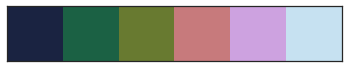

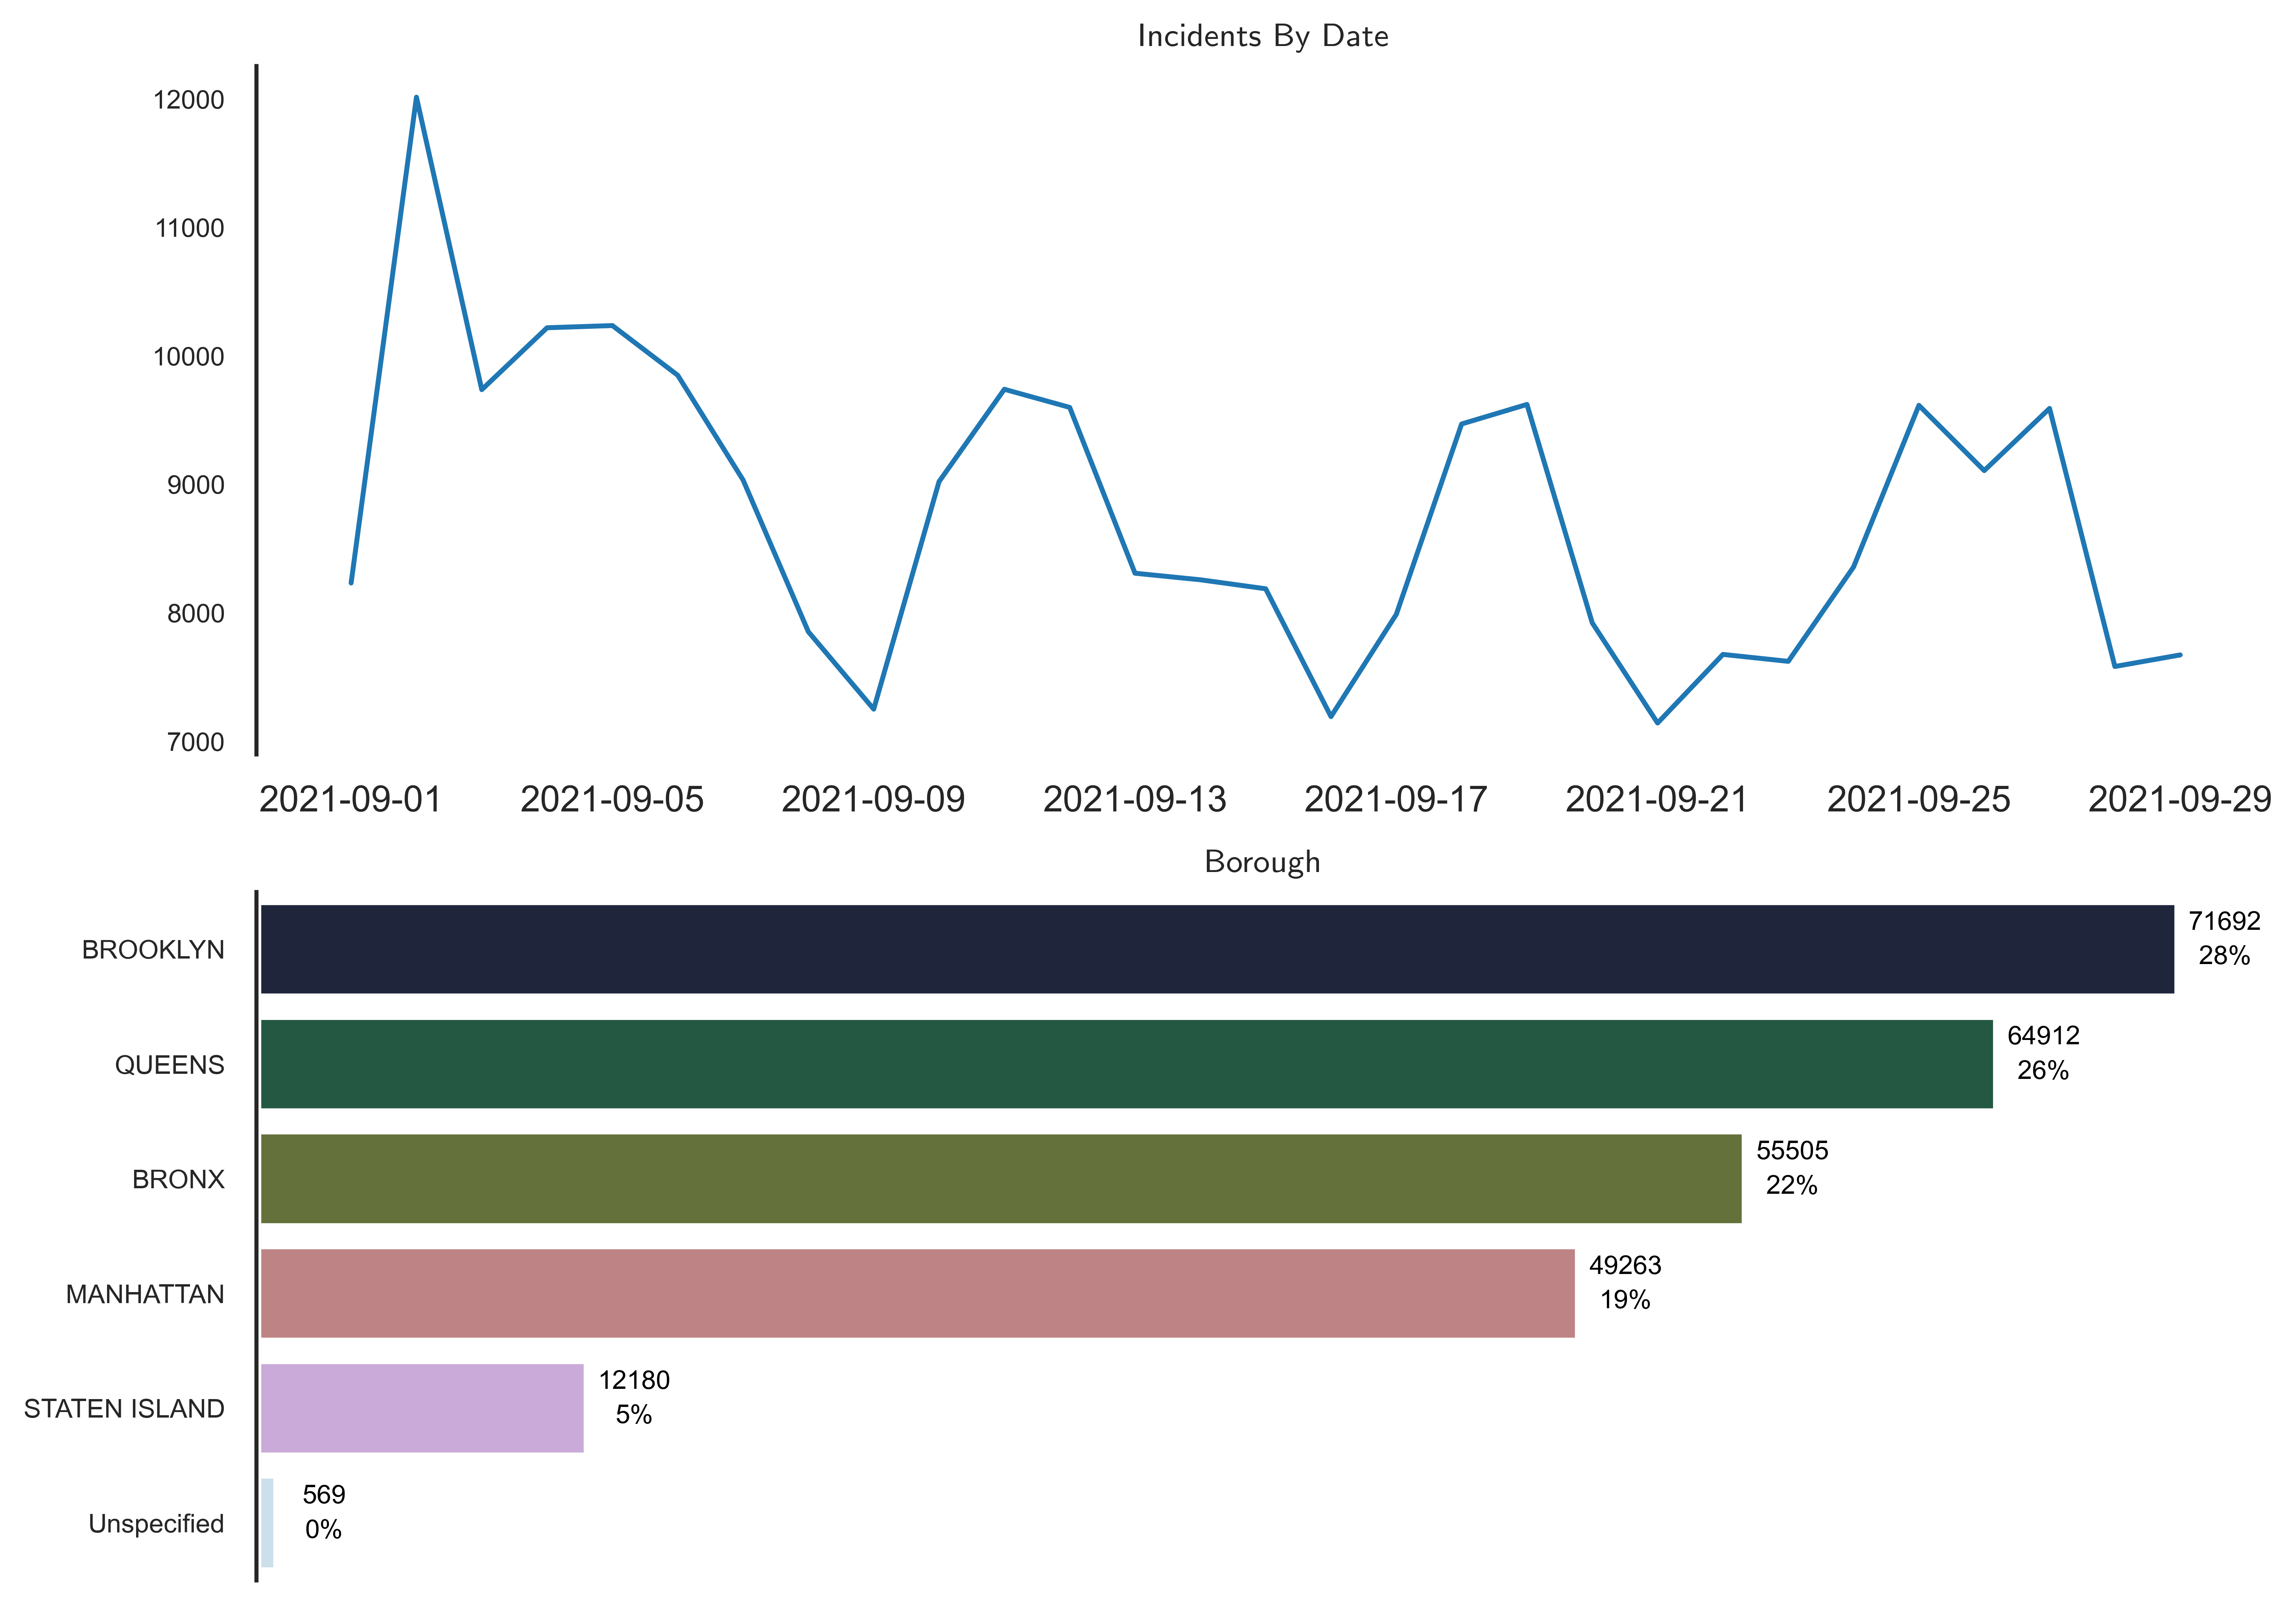

In [20]:
ui = sns.color_palette("cubehelix")
#ui = ['#7fb24d','#4ac9c9','#488cd1','#4545d9','#9143e0','#f73939','#ff9935']
sns.set(style='white', palette= sns.palplot(sns.color_palette("cubehelix")),font='sans-serif')
            #sns.palplot(sns.color_palette(flatui))
fig, axs = plt.subplots(2, 1, dpi =600,figsize=(11, 8.5));
fig.subplots_adjust(wspace=.75)
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
plt.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off

sns.lineplot(data=d.groupby(['Date']).size(), x=d.groupby(['Date']).size().index,y=d.groupby(['Date']).size(), ax=axs[0]);
axs[0].set_xlabel('')
axs[0].set_ylabel('')
#axs[0].set_xticks([])
axs[0].set_title('Incidents By Date',size = 'small', usetex = True)
axs[0].tick_params(axis='y', which='major', labelsize=8)
sns.despine(top=True, right=True, left=False, bottom=True,offset=True)


sns.countplot(y='Borough', data=d, palette = ui,orient='h',order = d['Borough'].value_counts().index, ax=axs[1]);
fig.subplots_adjust(wspace=.75)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xticks([])
axs[1].set_title('Borough',size = 'small', usetex = True)
axs[1].tick_params(axis='y', which='major', labelsize=8)
sns.despine(top=True, right=True, left=False, bottom=True,offset=True)
sumwidth = []
for p in axs[1].patches:
    axs[1].annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(15, -8),
             fontsize=8,color='#000000',textcoords='offset points'
             ,horizontalalignment='center')
    sumwidth.append(int(p.get_width()))
sumwidth = np.sum(sumwidth)
for p in axs[1].patches:
    axs[1].annotate('{:.0f}%'.format((int(p.get_width())/sumwidth)*100),((p.get_x() + p.get_width()), p.get_y()+.3), xytext=(15, -8),
             fontsize=8,color='#000000',textcoords='offset points'
             ,horizontalalignment='center')
#########################################################################################################################################
##########################################################################################################################################



# sns.countplot(y='Borough', data=d, palette = ui,orient='h',order = d['Borough'].value_counts().index, ax=axs[2]);
# axs[2].set_xlabel('')
# axs[2].set_ylabel('')
# axs[2].set_xticks([])
# axs[2].set_title('Borough',size = 'small', usetex = True)
# axs[2].tick_params(axis='y', which='major', labelsize=8)
# sns.despine(top=True, right=True, left=False, bottom=True,offset=True)
# sumwidth = []
# for p in axs[2].patches:
#     axs[2].annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(15, -8),
#              fontsize=8,color='#000000',textcoords='offset points'
#              ,horizontalalignment='center')
#     sumwidth.append(int(p.get_width()))
# sumwidth = np.sum(sumwidth)
# for p in axs[2].patches:
#     axs[2].annotate('{:.0f}\%'.format((int(p.get_width())/sumwidth)*100),((p.get_x() + p.get_width()), p.get_y()+.3), xytext=(15, -8),
#              fontsize=8,color='#000000',textcoords='offset points'
#              ,horizontalalignment='center')
#########################################################################################################################################
##########################################################################################################################################
#axs[2].barh(y=d.groupby(['Borough'])['Status'].size().sort_values(ascending=True).index, width=d.groupby(['Borough'])['Status'].size().sort_values(ascending=True),); #order = d['Borough'].value_counts().index
# piv = pd.pivot_table(d, index='Borough',columns='Agency',values='Unique Key',aggfunc= lambda x: len(x))
# piv = piv.fillna(0)
# piv.plot(kind='bar',color=sns.color_palette("cubehelix").as_hex(), ax = axs[2])
# #d.groupby(['Borough','Agency'])['Agency'].size()
# axs[2].set_xlabel('')
# axs[2].set_ylabel('')
# axs[2].set_xticks([])
# axs[2].set_title('Agency',size = 'small', usetex = True)
# axs[2].tick_params(axis='y', which='major', labelsize=8)
# sns.despine(top=True, right=True, left=False, bottom=True,offset=True)
# sumwidth = []
# for p in axs[2].patches:
#     axs[2].annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(15, -2),
#              fontsize=8,color='#000000',textcoords='offset points'
#              ,horizontalalignment='center')
#     sumwidth.append(int(p.get_width()))
# sumwidth = np.sum(sumwidth)
# for p in axs[2].patches:
#     axs[2].annotate('{:.0f}\%'.format((int(p.get_width())/sumwidth)*100),((p.get_x() + p.get_width()), p.get_y()+.3), xytext=(15, -2),
#              fontsize=8,color='#000000',textcoords='offset points'
#              ,horizontalalignment='center')
plt.savefig(R'Q:\reports_311\test.pdf')
plt.show()

In [14]:
print('Done')

Done
